# Visualizing Operations with Dask Dataframes on Fiscal Data

This post includes code from [Scalable-Data-Analysis-in-Python-with-Dask](https://github.com/PacktPublishing/-Scalable-Data-Analysis-in-Python-with-Dask/tree/master/Section%202) and [coiled-examples](https://github.com/coiled/coiled-examples).

In [2]:
import numpy as np
import dask.array as da
import pandas as pd
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

In [3]:
engine = db.create_engine("sqlite:///fiscal_data.db")
connection = engine.connect()
metadata = db.MetaData()

In [5]:
#engine.execute("SELECT * FROM fiscal_data LIMIT 1").fetchall()

In [4]:
sql = """
SELECT year
, region
, province
, gdp
, fdi
, it
, specific
FROM fiscal_data
"""

cnxn = connection

In [5]:
df = pd.read_sql(sql, cnxn)

In [6]:
df

,year,region,province,gdp,fdi,it,specific
0,1996,East China,Anhui,2093.3,50661,631930,147002.0
1,1997,East China,Anhui,2347.32,43443,657860,151981.0
2,1998,East China,Anhui,2542.96,27673,889463,174930.0
3,1999,East China,Anhui,2712.34,26131,1227364,285324.0
4,2000,East China,Anhui,2902.09,31847,1499110,195580.0
...,...,...,...,...,...,...,...
355,2003,East China,Zhejiang,9705.02,498055,2261631,391292.0
356,2004,East China,Zhejiang,11648.7,668128,3162299,656175.0
357,2005,East China,Zhejiang,13417.68,772000,2370200,656175.0
358,2006,East China,Zhejiang,15718.47,888935,2553268,1017303.0


In [7]:
df.columns

Index(['year', 'region', 'province', 'gdp', 'fdi', 'it', 'specific'], dtype='object')

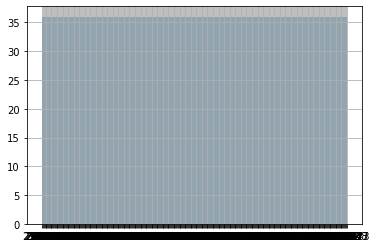

In [8]:
df.gdp.hist()

In [9]:
from dask.distributed import Client

client = Client(processes=False, threads_per_worker=2,
                n_workers=3, memory_limit='4GB')
client

Client Scheduler: inproc://192.168.1.71/5995/1 Dashboard: http://192.168.1.71:8787/status,Cluster Workers: 3 Cores: 6 Memory: 12.00 GB


In [10]:
from dask import dataframe as dd 

In [11]:
ddf = dd.from_pandas(df, npartitions=5)

In [12]:
print(ddf)

Dask DataFrame Structure:
                year  region province     gdp    fdi     it specific
npartitions=5                                                       
0              int64  object   object  object  int64  int64  float64
72               ...     ...      ...     ...    ...    ...      ...
...              ...     ...      ...     ...    ...    ...      ...
288              ...     ...      ...     ...    ...    ...      ...
359              ...     ...      ...     ...    ...    ...      ...
Dask Name: from_pandas, 5 tasks


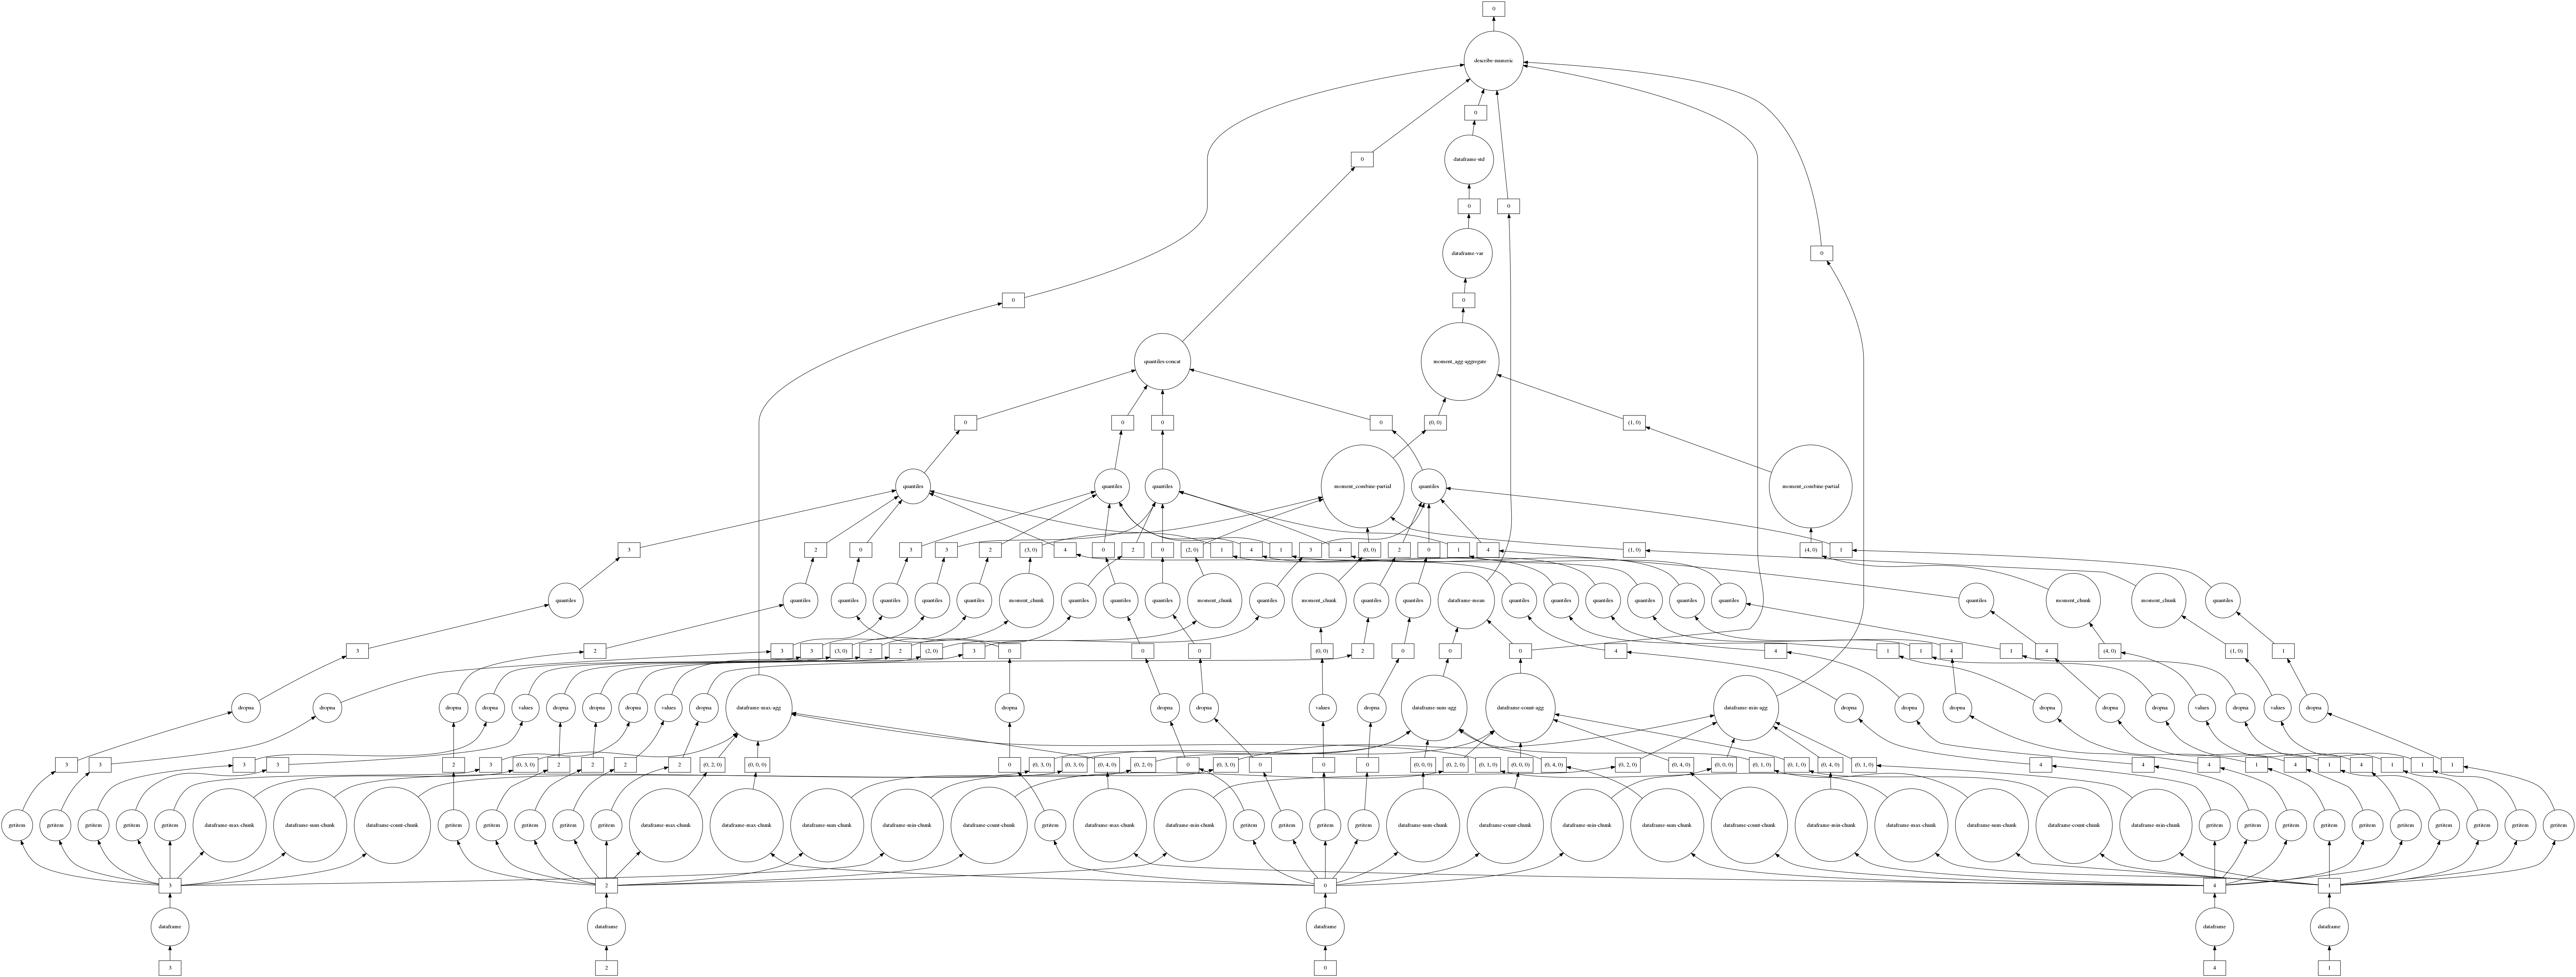

In [13]:
ddf.describe().visualize(filename='describe.png')

In [14]:
ddf.head()

,year,region,province,gdp,fdi,it,specific
0,1996,East China,Anhui,2093.3,50661,631930,147002.0
1,1997,East China,Anhui,2347.32,43443,657860,151981.0
2,1998,East China,Anhui,2542.96,27673,889463,174930.0
3,1999,East China,Anhui,2712.34,26131,1227364,285324.0
4,2000,East China,Anhui,2902.09,31847,1499110,195580.0


In [15]:
max_gdp_per_region = ddf.groupby('region')['gdp'].max()

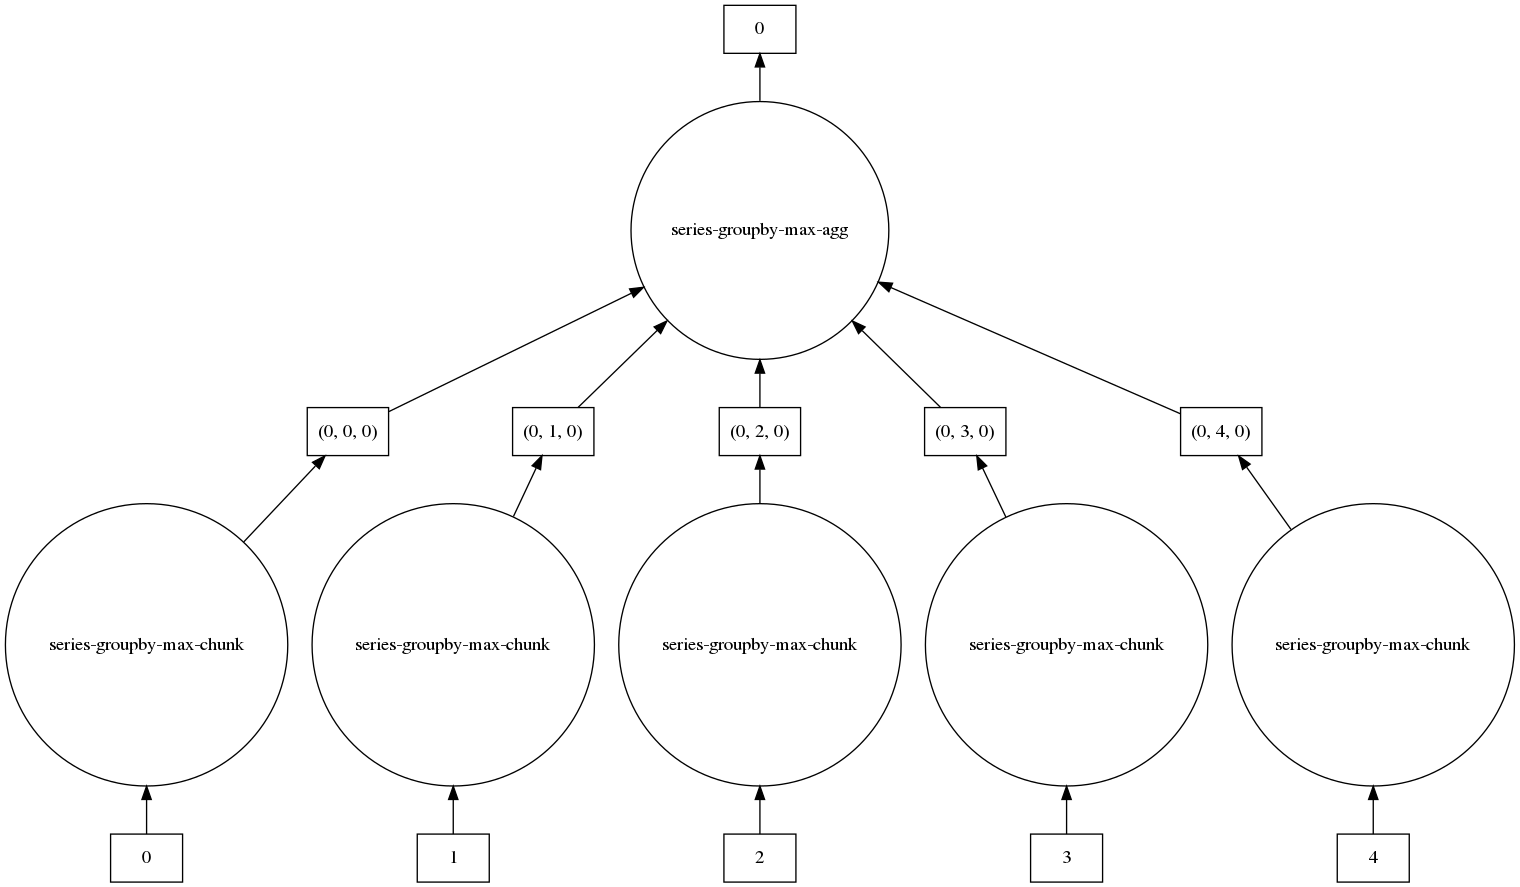

In [16]:
max_gdp_per_region.visualize()

In [17]:
max_gdp_per_region.compute()

region
East China             9705.02
North China            9846.81
Northwest China         956.32
South Central China     9439.6
Southwest China          937.5
Northeast China        9304.52
Name: gdp, dtype: object

In [18]:
ddf

,year,region,province,gdp,fdi,it,specific
npartitions=5,,,,,,,
0,int64,object,object,object,int64,int64,float64
72,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
288,...,...,...,...,...,...,...
359,...,...,...,...,...,...,...


In [19]:
ddf.npartitions

5

In [20]:
ddf.npartitions

5

In [21]:
len(ddf)

360

In [22]:
from dask.distributed import Client

client = Client(processes=False, threads_per_worker=2, n_workers=3, memory_limit="4GB")
client

/home/gao/anaconda3/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39701 instead
  http_address["port"], self.http_server.port


Client Scheduler: inproc://192.168.1.71/5995/20 Dashboard: http://192.168.1.71:39701/status,Cluster Workers: 3 Cores: 6 Memory: 12.00 GB


In [23]:
client.id

'Client-9f9a71c2-0c90-11eb-976b-cff3b7a8059e'

In [24]:
ddf.describe().compute()

,year,fdi,it,specific
count,360.000000,3.600000e+02,3.600000e+02,3.560000e+02
mean,2001.500000,1.961394e+05,2.165819e+06,5.834707e+05
std,3.456857,3.030440e+05,1.769294e+06,6.540553e+05
min,1996.000000,2.000000e+00,1.478970e+05,8.964000e+03
25%,1998.750000,3.309900e+04,1.077466e+06,2.237530e+05
50%,2001.500000,1.411025e+05,2.020634e+06,4.243700e+05
75%,2004.250000,4.065125e+05,3.375492e+06,1.011846e+06
max,2007.000000,1.743140e+06,1.053331e+07,3.937966e+06


In [25]:
ddf.columns

Index(['year', 'region', 'province', 'gdp', 'fdi', 'it', 'specific'], dtype='object')

In [27]:
ddf["year"] = ddf["year"].astype(int)
ddf["fdi"] = ddf["fdi"].astype(float)
# ddf["province"] = ddf["province"].astype(float)
# ddf["region"] = ddf["region"].astype(float)
ddf["gdp"] = ddf["gdp"].astype(float)
ddf["it"] = ddf["it"].astype(float)

In [28]:
ddf

,year,region,province,gdp,fdi,it,specific
npartitions=5,,,,,,,
0,int64,object,object,float64,float64,float64,float64
72,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
288,...,...,...,...,...,...,...
359,...,...,...,...,...,...,...


In [29]:
ddf.nlargest(20, 'gdp').compute()

,year,region,province,gdp,fdi,it,specific
71,2007,South Central China,Guangdong,31777.01,1712603.0,4947824.0,859482.0
70,2006,South Central China,Guangdong,26587.76,1451065.0,4559252.0,1897575.0
263,2007,East China,Shandong,25776.91,1101159.0,6357869.0,2121243.0
69,2005,South Central China,Guangdong,22557.37,1236400.0,4327217.0,1491588.0
262,2006,East China,Shandong,21900.19,1000069.0,5304833.0,1204547.0
179,2007,East China,Jiangsu,21742.05,1743140.0,3557071.0,1188989.0
68,2004,South Central China,Guangdong,18864.62,1001158.0,5193902.0,1491588.0
359,2007,East China,Zhejiang,18753.73,1036576.0,2939778.0,844647.0
178,2006,East China,Jiangsu,18598.69,1318339.0,2926542.0,1388043.0
261,2005,East China,Shandong,18366.87,897000.0,4142859.0,1011203.0


In [30]:
without_ec = ddf[ddf.region !='East China']

In [31]:
without_ec.nlargest(20, 'gdp').compute()

,year,region,province,gdp,fdi,it,specific
71,2007,South Central China,Guangdong,31777.01,1712603.0,4947824.0,859482.0
70,2006,South Central China,Guangdong,26587.76,1451065.0,4559252.0,1897575.0
69,2005,South Central China,Guangdong,22557.37,1236400.0,4327217.0,1491588.0
68,2004,South Central China,Guangdong,18864.62,1001158.0,5193902.0,1491588.0
67,2003,South Central China,Guangdong,15844.64,782294.0,4073606.0,1550764.0
143,2007,South Central China,Henan,15012.46,306162.0,10533312.0,3860764.0
119,2007,North China,Hebei,13607.32,241621.0,7537692.0,2981235.0
66,2002,South Central China,Guangdong,13502.42,1133400.0,3545004.0,1235386.0
142,2006,South Central China,Henan,12362.79,184526.0,7601825.0,2018158.0
65,2001,South Central China,Guangdong,12039.25,1193203.0,2152243.0,1257232.0


In [32]:
ddf['province'].compute()

0         Anhui
1         Anhui
2         Anhui
3         Anhui
4         Anhui
         ...   
355    Zhejiang
356    Zhejiang
357    Zhejiang
358    Zhejiang
359    Zhejiang
Name: province, Length: 360, dtype: object

In [33]:
ddf.where(ddf['province']=='Zhejiang').compute()

,year,region,province,gdp,fdi,it,specific
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
355,2003.0,East China,Zhejiang,9705.02,498055.0,2261631.0,391292.0
356,2004.0,East China,Zhejiang,11648.70,668128.0,3162299.0,656175.0
357,2005.0,East China,Zhejiang,13417.68,772000.0,2370200.0,656175.0
358,2006.0,East China,Zhejiang,15718.47,888935.0,2553268.0,1017303.0


In [34]:
mask_after_2010 = ddf.where(ddf['year']>2000)

In [35]:
mask_after_2010.compute()

,year,region,province,gdp,fdi,it,specific
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
355,2003.0,East China,Zhejiang,9705.02,498055.0,2261631.0,391292.0
356,2004.0,East China,Zhejiang,11648.70,668128.0,3162299.0,656175.0
357,2005.0,East China,Zhejiang,13417.68,772000.0,2370200.0,656175.0
358,2006.0,East China,Zhejiang,15718.47,888935.0,2553268.0,1017303.0


In [36]:
def add_some_text(cname, *args, **kwargs):
    return "Region name is " + cname

dummy_values = ddf['region'].apply(add_some_text, axis=1)

/home/gao/anaconda3/lib/python3.7/site-packages/dask/dataframe/core.py:3208: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('region', 'object'))

  warnings.warn(meta_warning(meta))


In [37]:
dummy_values

Dask Series Structure:
npartitions=5
0      object
72        ...
        ...  
288       ...
359       ...
Name: region, dtype: object
Dask Name: apply, 75 tasks

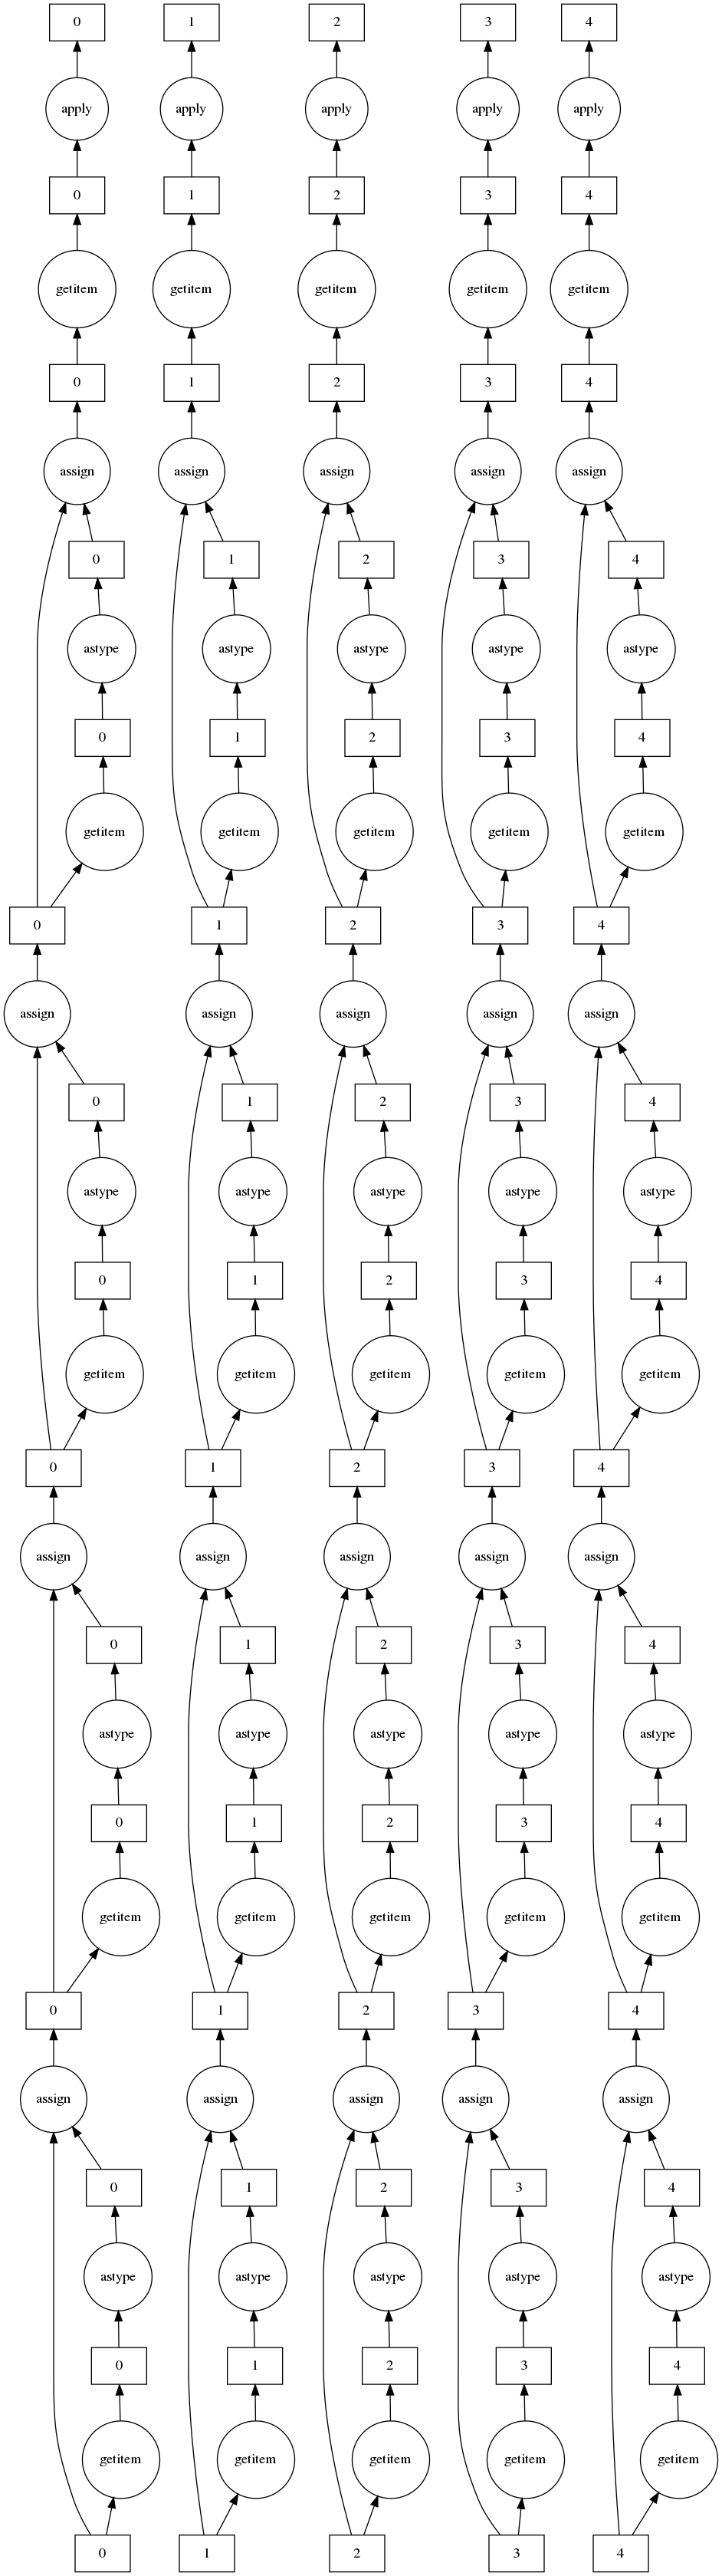

In [38]:
dummy_values.visualize()

In [39]:
dummy_values.compute()

0      Region name is East China
1      Region name is East China
2      Region name is East China
3      Region name is East China
4      Region name is East China
                 ...            
355    Region name is East China
356    Region name is East China
357    Region name is East China
358    Region name is East China
359    Region name is East China
Name: region, Length: 360, dtype: object

In [40]:
max_per_region_yr = ddf.groupby('region').apply(lambda x: x.loc[x['gdp'].idxmax(), 'year'])

/home/gao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  """Entry point for launching an IPython kernel.


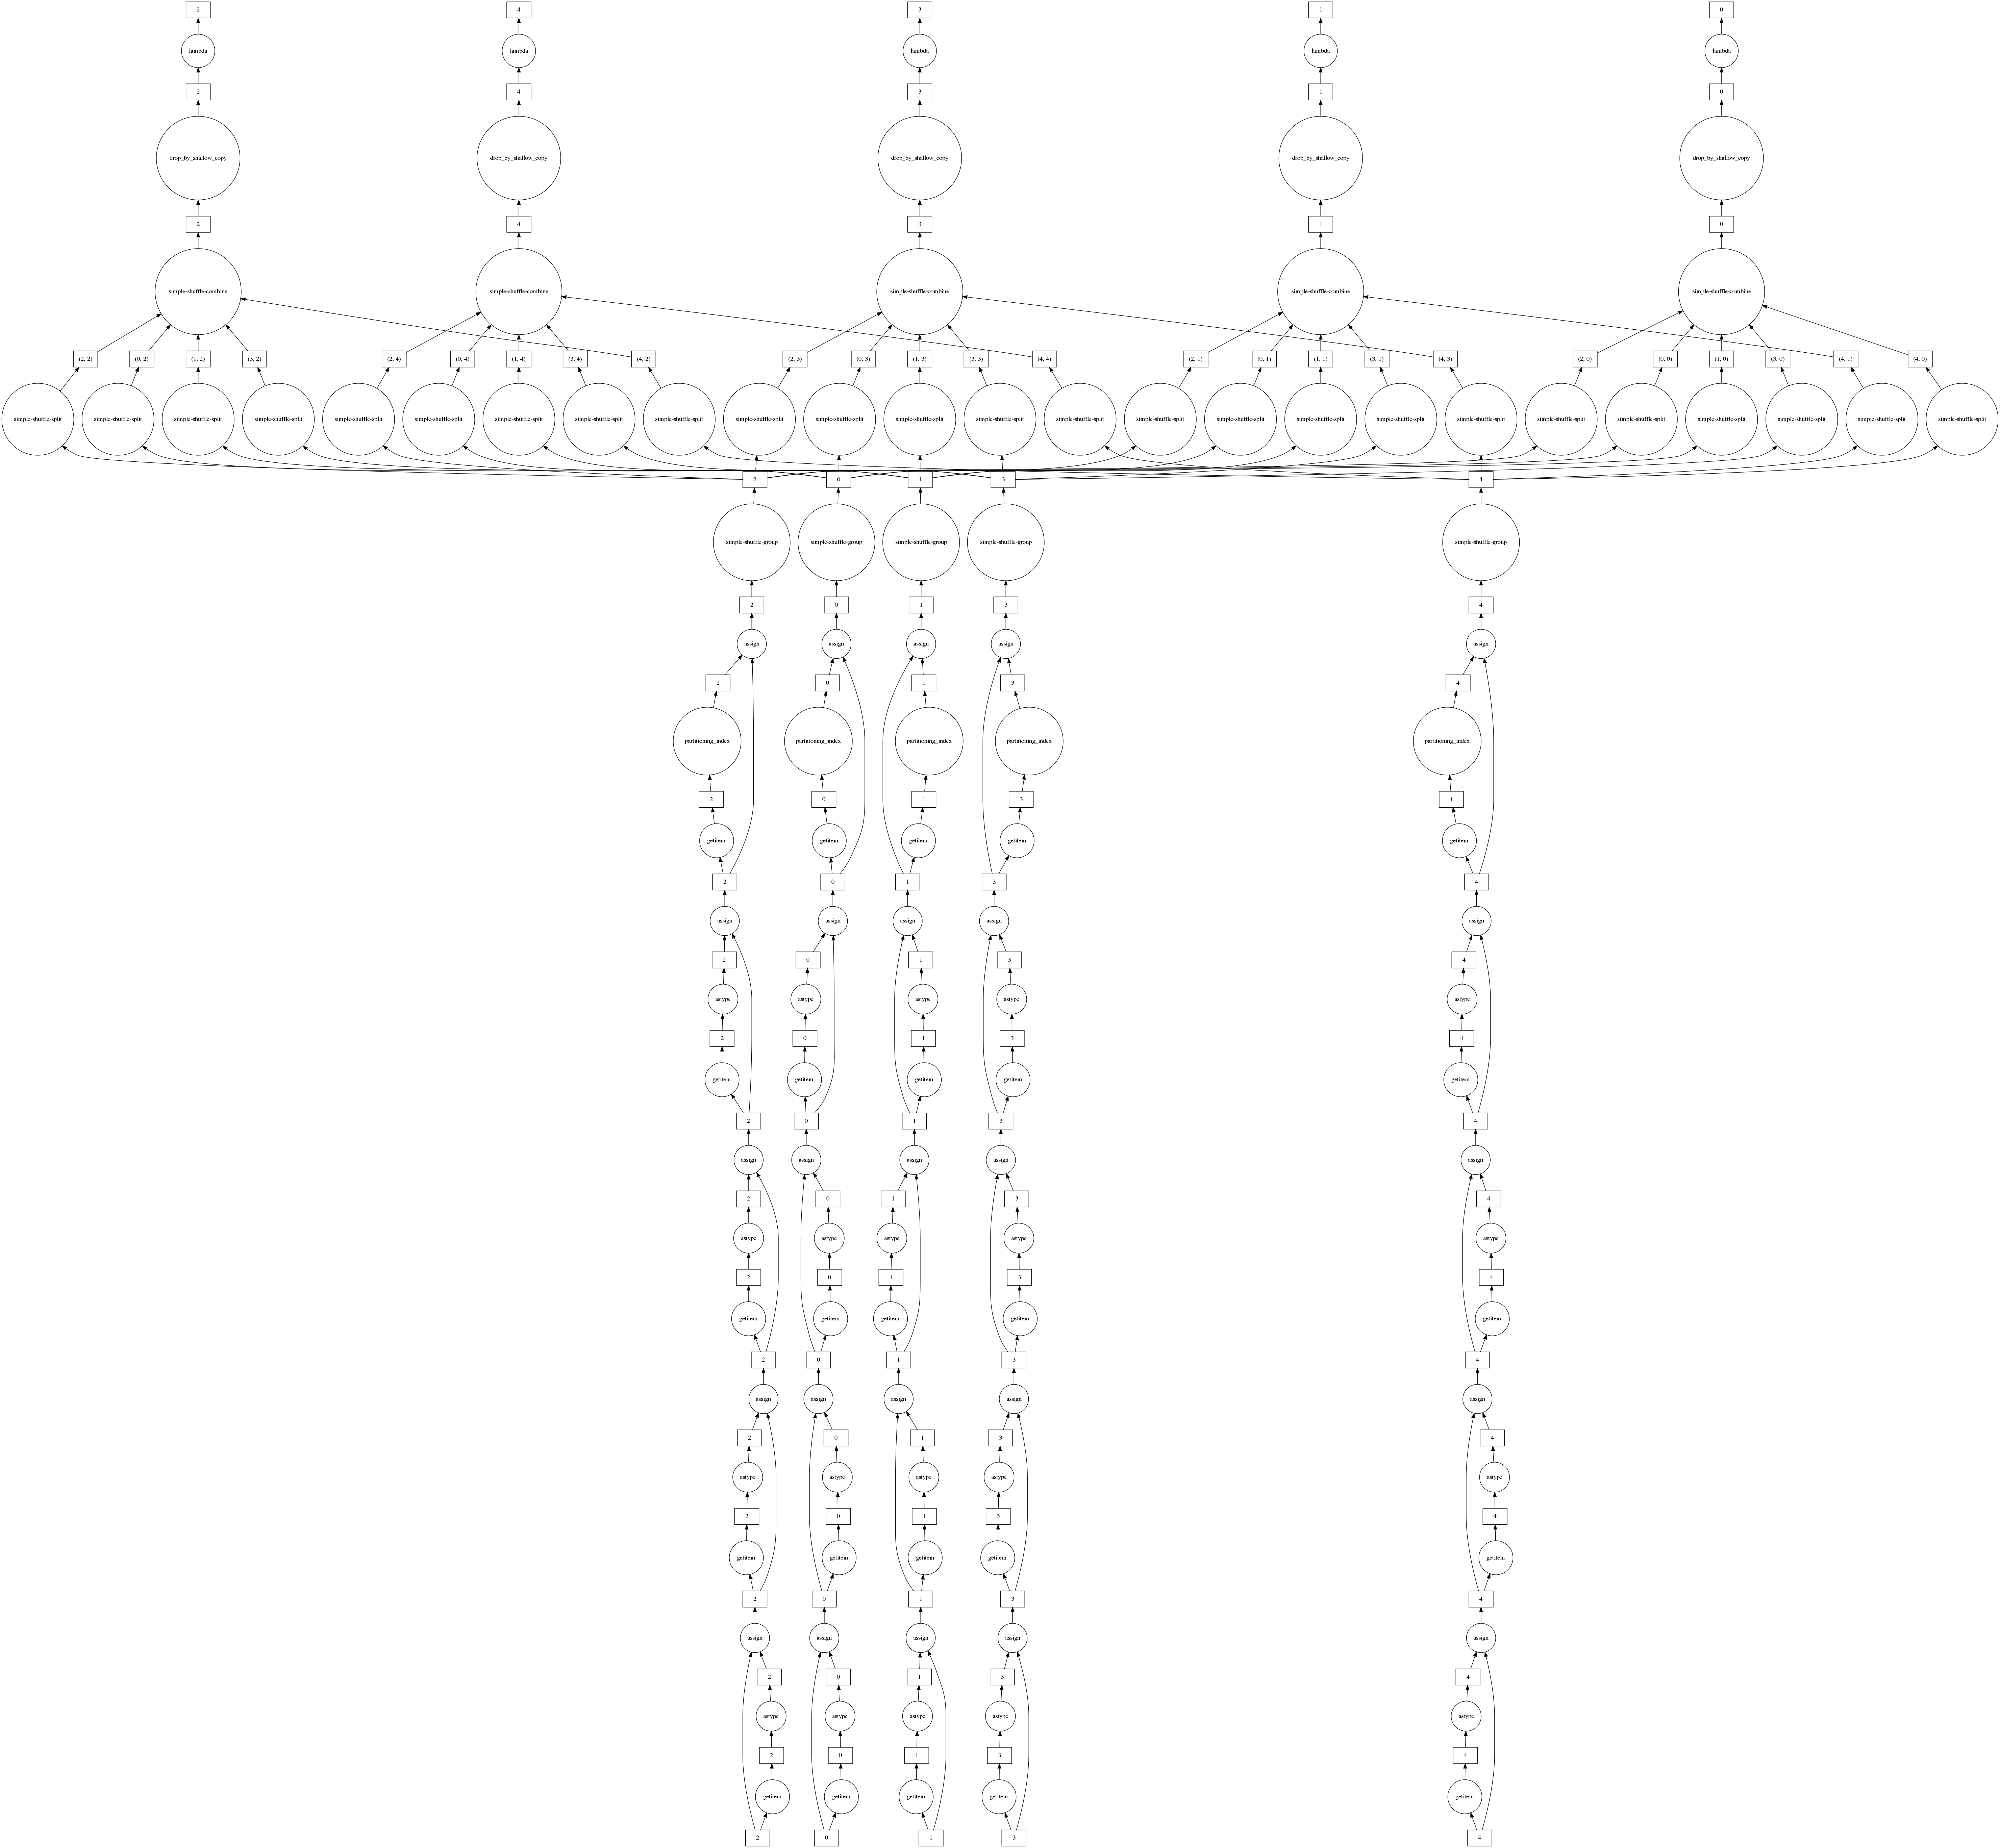

In [41]:
max_per_region_yr.visualize()

In [42]:
max_per_region_yr.compute()

region
North China            2007
Northeast China        2007
Northwest China        2007
South Central China    2007
East China             2007
Southwest China        2007
dtype: int64